<a href="https://colab.research.google.com/github/Manikanta-Korrapati/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction Using Machine Learning**


---





# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
car=pd.read_csv('/content/car data.csv')

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Data conversion**

In [ ]:
car.drop('Car_Name',axis=1,inplace=True)

In [ ]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [ ]:
car['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,Manual,0
1,2013,4.75,9.54,43000,1,0,Manual,0
2,2017,7.25,9.85,6900,0,0,Manual,0
3,2011,2.85,4.15,5200,0,0,Manual,0
4,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,Manual,0
297,2015,4.00,5.90,60000,0,0,Manual,0
298,2009,3.35,11.00,87934,0,0,Manual,0
299,2017,11.50,12.50,9000,1,0,Manual,0


In [ ]:
car['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


# **Data Visualizaton**

<Axes: xlabel='Year', ylabel='Selling_Price'>

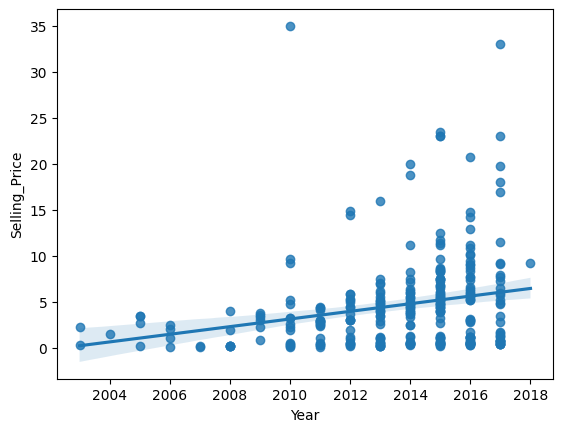

In [ ]:
sns.regplot(x='Year',y='Selling_Price',data=car)

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

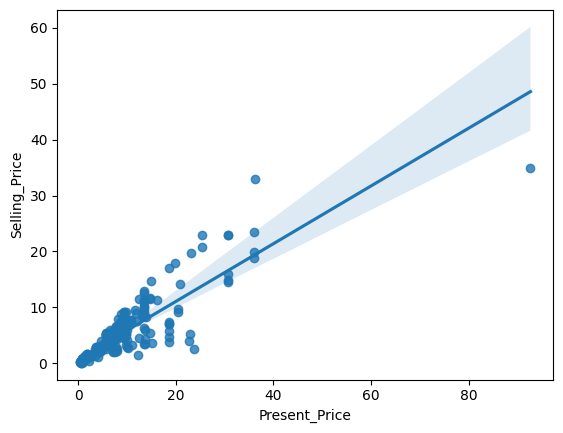

In [ ]:
sns.regplot(x='Present_Price',y='Selling_Price',data=car)

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=car['Selling_Price']
x=car[['Year','Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [ ]:
x.shape

(301, 7)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Present_Price  301 non-null    float64
 2   Driven_kms     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Selling_type   301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.6 KB


In [ ]:
y.shape

(301,)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 301 entries, 0 to 300
Series name: Selling_Price
Non-Null Count  Dtype  
--------------  -----  
301 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train,x_train.shape

(     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
 91   2014         16.090       58242          1             0             0   
 1    2013          9.540       43000          1             0             0   
 79   2012         30.610       89000          1             0             1   
 77   2004         12.350      135154          0             0             1   
 70   2014          6.760       71000          1             0             0   
 ..    ...            ...         ...        ...           ...           ...   
 80   2016         14.890       23000          1             0             0   
 83   2015         13.460       38000          1             0             0   
 200  2006          0.750       92233          0             1             0   
 154  2014          0.880        8000          0             1             0   
 161  2014          0.826       23000          0             1             0   
 
      Owner  
 91       0  
 1        

In [ ]:
y_train,y_train.shape

(91     11.25
 1       4.75
 79     14.50
 77      1.50
 70      3.95
        ...  
 80     14.73
 83     12.50
 200     0.10
 154     0.50
 161     0.45
 Name: Selling_Price, Length: 225, dtype: float64,
 (225,))

In [ ]:
x_train.dtypes

Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
x_test,x_test.shape

(     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
 264  2015           7.00       40026          0             0             0   
 208  2017           8.10        3435          0             0             0   
 44   2012           2.69       50000          0             0             0   
 117  2015           1.90       14000          0             1             0   
 296  2016          11.60       33988          1             0             0   
 ..    ...            ...         ...        ...           ...           ...   
 243  2016           7.60        7000          0             0             0   
 104  2017           1.47        4100          0             1             0   
 222  2014           7.60       77632          1             0             0   
 41   2014           3.98       46706          0             0             0   
 234  2015           5.70        4492          0             0             0   
 
      Owner  
 264      0  
 208      

In [ ]:
y_test,y_test.shape

(264    4.00
 208    7.90
 44     1.25
 117    1.10
 296    9.50
        ... 
 243    6.25
 104    1.35
 222    6.00
 41     2.55
 234    5.50
 Name: Selling_Price, Length: 76, dtype: float64,
 (76,))

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
carprice=LinearRegression()

In [ ]:
carprice.fit(x_train,y_train)

LinearRegression()

In [ ]:
carprice.intercept_

-864.3632559349046

In [ ]:
carprice.coef_

array([ 4.29980521e-01,  4.26560681e-01, -5.25917995e-06,  1.77942840e+00,
       -1.18522579e+00,  1.05301524e+00, -6.35514090e-01])

# **Prediction**

In [ ]:
carprice_pred=carprice.predict(x_test)

In [ ]:
carprice_pred

array([ 4.82291554,  6.34453199,  1.64204238,  1.5991057 ,  9.02625853,
        2.35092683,  8.63334864,  7.54306813,  9.16998017,  0.96638827,
        0.25058702, -1.95995029,  6.06831114,  2.1284068 ,  7.20770959,
        4.9635506 ,  0.44432207,  0.09234863,  5.28158329,  7.32380145,
        7.5908445 ,  0.81469705,  4.34910455,  7.73417503,  7.07279012,
       -0.03438647,  8.01804502,  0.91554746,  6.12487623,  4.41382448,
        6.38677408,  4.33058172,  4.24757813, -2.07485046,  4.30482303,
        1.52159864,  3.52104433,  4.86225719,  5.11228365,  7.46350606,
        0.09193768,  4.2906972 , 13.77749977, 15.98777834,  1.69485251,
        6.32398282,  7.26163542,  1.58446954, 14.09411635,  4.99459109,
        5.84437355,  5.86783463,  6.10416228, -0.48216208, -1.43409896,
       17.72659359,  4.43184586,  1.0616408 ,  5.6970551 ,  9.09465193,
        5.20022258,  4.3110585 ,  7.94240873,  2.46047126, -1.18150021,
        6.17325017, -3.4836516 ,  5.99747479,  8.21032076,  5.11

# **Data Visualization of Actual vs Predicted Data**

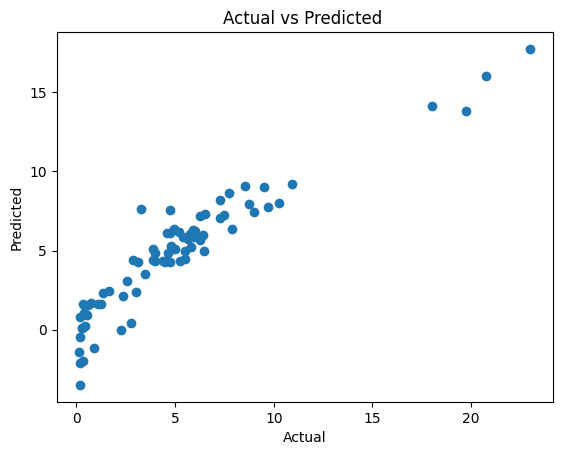

In [ ]:
plt.scatter(y_test,carprice_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ")
plt.show()

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,carprice_pred)

1.1829861220981912

# **Future Predictions**

In [ ]:
car_new=car.sample(1)

In [ ]:
car_new

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
11,2015,6.85,10.38,51000,1,0,0,0


In [ ]:
car_latest=car_new.drop('Selling_Price',axis=1)

In [ ]:
car_latest

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
92,2005,13.7,75000,0,0,0,0


In [ ]:
carprice_newprid=carprice.predict(car_latest)

In [ ]:
carprice_newprid

array([3.40509966])